In [1]:
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def show_img(img):
    plt.figure(figsize=(20, 10))
    plt.imshow(img,  cmap="gray")

In [3]:
def create_distorted_image(img):
    # зміна контрастності
    alpha = 1.5
    beta = 0
    img_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    # додавання шуму
    mean = 0
    std_dev = 20
    noise = np.zeros(img.shape, img.dtype)
    cv2.randn(noise, mean, std_dev)
    img_noise = cv2.add(img_contrast, noise)

    return img_noise

In [4]:
# побудова дескриптора A-KAZE для зображення
def build_akaze_descriptor(img):
    akaze = cv2.AKAZE_create()
    kp, des = akaze.detectAndCompute(img, None)
    return kp, des

In [6]:
def match_descriptors(des1, des2, threshold=0.7):
    """
    Функція для порівняння дескрипторів.
    Повертає список відповідних точок зображень.
    
    :param des1: дескриптор першого зображення
    :param des2: дескриптор другого зображення
    :param threshold: поріг відсікання для порівняння дескрипторів
    :return: список відповідних точок зображень
    """
    matches = []
    for i in range(len(des1)):
        best_match = None
        second_best_match = None
        best_match_distance = float('inf')
        second_best_match_distance = float('inf')
        
        for j in range(len(des2)):
            distance = np.linalg.norm(des1[i] - des2[j])
            
            if distance < best_match_distance:
                second_best_match = best_match
                second_best_match_distance = best_match_distance
                best_match = j
                best_match_distance = distance
            elif distance < second_best_match_distance:
                second_best_match = j
                second_best_match_distance = distance
                
        if best_match_distance < threshold * second_best_match_distance:
            dmatch = cv2.DMatch()
            dmatch.queryIdx = i
            dmatch.trainIdx = best_match
            dmatch.distance = best_match_distance
            matches.append(dmatch)
            
    return matches

In [7]:
img1 = np.array(Image.open('low_det.jpg').convert('L'))
img2 = np.array(Image.open('low_con.jpg').convert('L'))
img3 = np.array(Image.open('high_det.jpg').convert('L'))
img4 = np.array(Image.open('high_con.jpg').convert('L'))

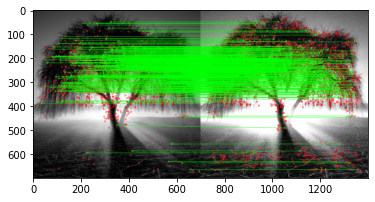

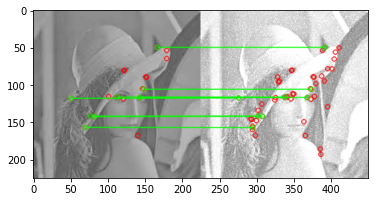

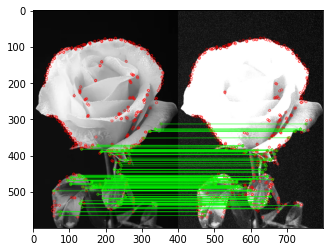

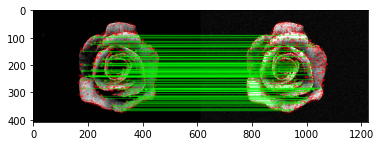

In [8]:
draw_params = dict(matchColor = (0,255,0),
               singlePointColor = (255,0,0),
               flags = 0)
for img in [img1, img2, img3, img4]:
    distorted_img = create_distorted_image(img)
    kp, des = build_akaze_descriptor(img) 
    kp_dist, des_dist = build_akaze_descriptor(distorted_img)
    matches = match_descriptors(des, des_dist)    


    out_img = cv2.drawMatches(img, kp, distorted_img, kp_dist, matches, None,**draw_params)
    plt.imshow(out_img)
    plt.show()

In [43]:
matches = match_descriptors(des1, des_dist1)